In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print("Python 环境路径:", sys.prefix)
print("Python 版本:", sys.version)
print("Python 可执行文件路径:", sys.executable)

2023-09-23 19:15:06.388044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 19:15:07.037898: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Python 环境路径: /home/jhr/anaconda3
Python 版本: 3.11.4 (main, Jul  5 2023, 14:15:25) [GCC 11.2.0]
Python 可执行文件路径: /home/jhr/anaconda3/bin/python


In [2]:
name = {0: "cup", 1: "gcup", 2: "bowl", 3: "plate", 4: "spoon"}
new_model = tf.saved_model.load("/home/jhr/Program/TensorFlow/00-model/model/last_saved_model-3")
model_signature = new_model.signatures["serving_default"]
print(model_signature)

ConcreteFunction signature_wrapper(*, x)
  Args:
    x: float32 Tensor, shape=(1, 640, 640, 3)
  Returns:
    {'output_0': <1>}
      <1>: float32 Tensor, shape=(1, 25200, 10)


2023-09-23 19:15:11.643126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 19:15:11.669270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 19:15:11.669490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

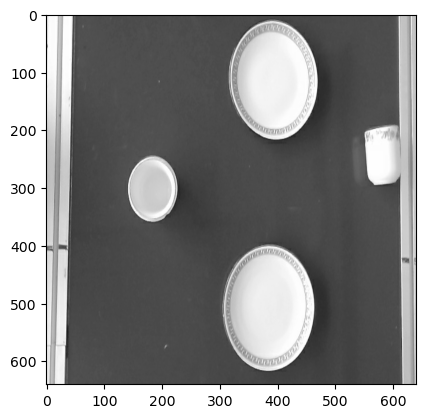

In [3]:
img=tf.io.read_file("/home/jhr/Program/TensorFlow/03-program/cap1_15.jpg")
img=tf.image.decode_jpeg(img,channels=3)
img=tf.image.resize(img,[640,640])
img=img/255.0
plt.imshow(img)

In [4]:
dataset=tf.constant(img)
print("shape1 ",dataset.shape)
dataset=np.expand_dims(dataset,0)
print("shape2 ",dataset.shape)

shape1  (640, 640, 3)
shape2  (1, 640, 640, 3)


In [5]:
resout = model_signature(x=dataset)
resout=resout["output_0"]
resout=np.array(resout)

2023-09-23 19:15:26.285154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8801
2023-09-23 19:15:27.929025: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-23 19:15:28.114952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
